<a href="https://colab.research.google.com/github/GavHal/Recent-projects-Public/blob/main/Building_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.8 MB/s eta 0:00:00


In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


ValueError: mount failed

In [ ]:
building_types = 'Gothic','Renaissance','Baroque','Neoclassical','Victorian','Art Nouveau','Art Deco','Modernist','Brutalist'
path = Path('building')

In [ ]:
 for item in path.glob('*'):
        # If the item is a directory, remove it recursively
        if item.is_dir():
            shutil.rmtree(item)
        # If the item is a file, simply remove it
        else:
            item.unlink()
if not path.exists():
    path.mkdir()
for o in building_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} building',max_images=150)
        download_images(dest, urls=results)
        print(o)

Gothic
Renaissance
Baroque
Neoclassical
Victorian
Art Nouveau
Art Deco
Modernist
Brutalist


In [ ]:
fns = get_image_files(path)
len(fns)

1288

In [ ]:
failed = verify_images(fns)

In [ ]:
failed.map(Path.unlink);

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
buildings = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
buildings = buildings.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = buildings.dataloaders(path)

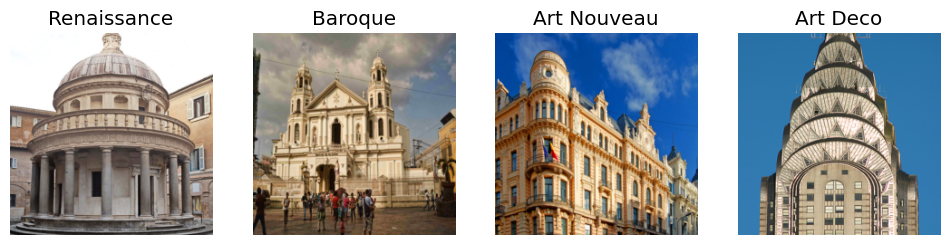

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, convnext_tiny, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.689493,1.759906,0.674510,01:09


epoch,train_loss,valid_loss,error_rate,time
0,1.445231,1.324307,0.478431,01:11
1,1.264567,0.894770,0.305882,01:13
2,1.145971,0.802112,0.254902,01:11
3,1.034769,0.797849,0.262745,01:12


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(4, nrows=4)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

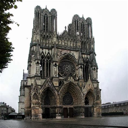

In [ ]:
ims = ['https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.9EA49RaQvgYIoAfu6u4jWAHaHZ%26pid%3DApi&f=1&ipt=a9b7f0006429a251a2f619565b2ffa4fbbdf2da2bb875574354de9c253102ce6&ipo=images']


dest = 'images/gothic.jpg'
download_url(ims[0],dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
print(learn_inf.predict('images/gothic.jpg'))
print(learn_inf.dls.vocab)

('Gothic', tensor(4), tensor([1.6288e-05, 2.6130e-05, 5.5373e-05, 2.3672e-06, 9.9762e-01, 7.0688e-08, 2.8373e-07, 1.6273e-04, 2.1132e-03]))
['Art Deco', 'Art Nouveau', 'Baroque', 'Brutalist', 'Gothic', 'Modernist', 'Neoclassical', 'Renaissance', 'Victorian']
